In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [221]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
# a bit of cleaning
df['item_name'] = df['item_name'].apply(lambda row: row.replace("-", " "))
df.drop(index = 4509, inplace = True)

#### 1. Вывести: кол-во наблюдений в датасете

In [222]:
len(df)

4621

#### 2. Вывести названия столбцов

In [223]:
print(*df.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


#### 3. Определить самую частую позицию (item) в заказе

In [224]:
print(*df.item_name.mode())

Chicken Bowl


#### 4. Построить гистрограмму частоты заказов по позициям (item)

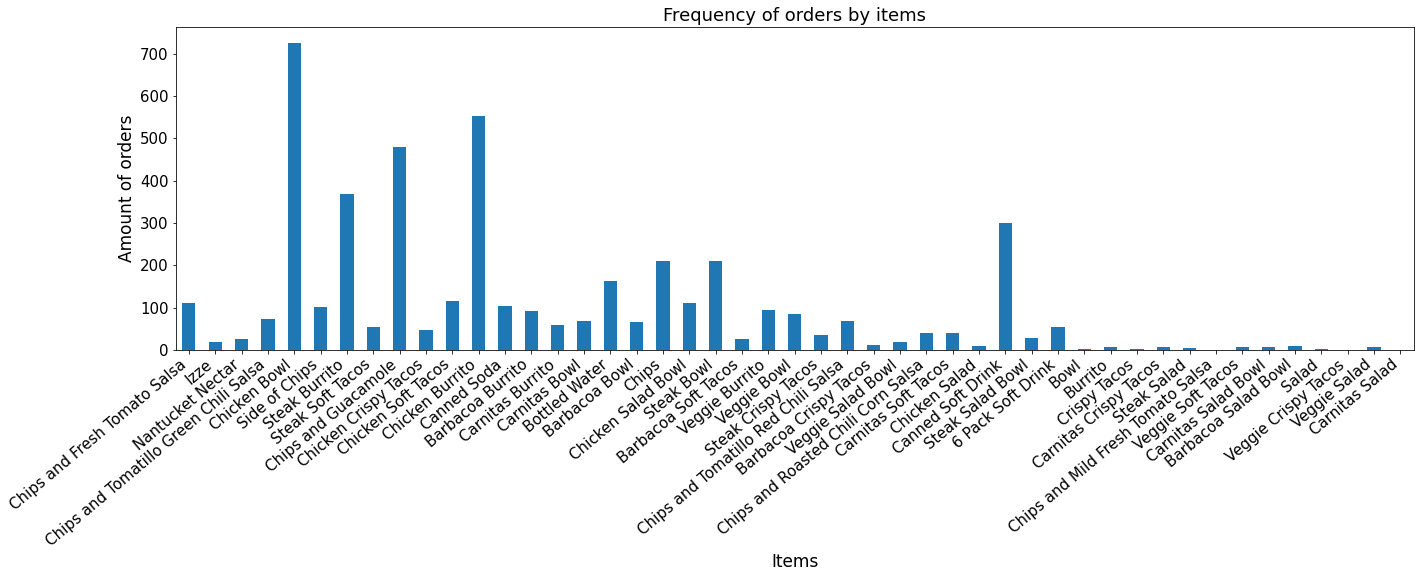

In [225]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
group = df.groupby('item_name', sort=False).order_id.count().reset_index()
ax = group.plot(x='item_name', y="order_id", kind="bar", legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel="Items", ylabel = "Amount of orders")
ax.yaxis.label.set_size(17)
ax.xaxis.label.set_size(17)
plt.tight_layout()
plt.title('Frequency of orders by items')
plt.show()

#### 5. Измените тип переменной item_price c с помощью лямбды функции

In [226]:
if df.dtypes['item_price'] == 'object':
    df['item_price'] = df['item_price'].apply(lambda row: float(row[1:]))
df.item_price.dtype

dtype('float64')

#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

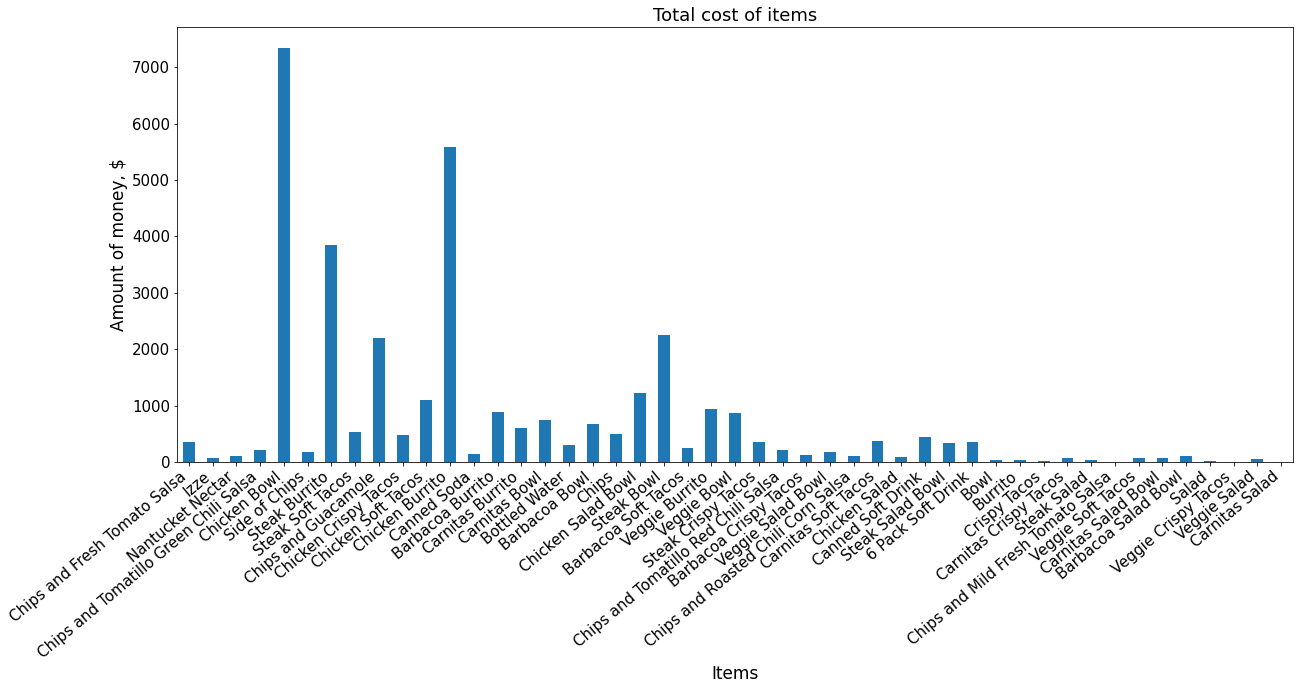

In [227]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15
group = df.groupby('item_name', sort=False).item_price.agg(np.sum)
ax = group.plot(y="item_price", kind="bar", legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel="Items", ylabel = "Amount of money, $")
ax.yaxis.label.set_size(17)
ax.xaxis.label.set_size(17)
plt.title('Total cost of items')
plt.show()

#### 7. Средняя сумма заказа? (минимум 2 способа)

In [228]:
#first way
avg = df.groupby('order_id', sort=False).item_price.sum().mean()
print(f'${round(avg, 2)}')
#second way
print(f'${round(df.item_price.sum() / df.order_id.nunique(), 2)}')
df.groupby('order_id', sort=False)

$18.81
$18.81


#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

In [229]:
group = df.groupby('order_id', sort=False).item_name.nunique().reset_index()
group.agg({
    'item_name': ['mean', 'min', 'max', 'median'],
})

,item_name
mean,2.339695
min,1.000000
max,8.000000
median,2.000000


#### 9. Определить статистику заказов стейков,

In [230]:
steaks = df[df.item_name.str.contains("Steak")]
steaks[["quantity", "item_price"]].describe()

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


#### а также статистику заказов прожарки.

In [231]:
roasting = df[df.choice_description.str.contains("Mild|Medium|Hot", na=False)]
roasting[["quantity", "item_price"]].describe()

,quantity,item_price
count,783.000000,783.000000
mean,1.054917,9.772031
std,0.238920,2.588239
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.

In [232]:
df['item_price_rubles'] = round(df.item_price * 71.56, 2)
df.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,171.03
1,1,1,Izze,[Clementine],3.39,242.59
2,1,1,Nantucket Nectar,[Apple],3.39,242.59
3,1,1,Chips and Tomatillo Green Chili Salsa,NaN,2.39,171.03
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1215.09


#### 11. Сгруппировать заказы по входящим позициям в него.

In [233]:
group1 = df.groupby('order_id', sort=False).agg({'item_name': lambda df: ", ".join(df), 
                                                 'item_price':np.sum,
                                                 'quantity':np.sum}).reset_index()
group1

,order_id,item_name,item_price,quantity
0,1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
1,2,Chicken Bowl,16.98,2
2,3,"Chicken Bowl, Side of Chips",12.67,2
3,4,"Steak Burrito, Steak Soft Tacos",21.00,2
4,5,"Steak Burrito, Chips and Guacamole",13.70,2
...,...,...,...,...
1829,1830,"Steak Burrito, Veggie Burrito",23.00,2
1830,1831,"Carnitas Bowl, Chips, Bottled Water",12.90,3
1831,1832,"Chicken Soft Tacos, Chips and Guacamole",13.20,2
1832,1833,"Steak Burrito, Steak Burrito",23.50,2


### Отдельно сгруппировать по стейкам во всех видах прожарках.

In [234]:
group2 = steaks.groupby('order_id', sort=False).agg({'item_name': lambda df: ", ".join(df), 
                                                 'item_price':np.sum,
                                                 'quantity':np.sum}).reset_index()
group2

,order_id,item_name,item_price,quantity
0,4,"Steak Burrito, Steak Soft Tacos",21.00,2
1,5,Steak Burrito,9.25,1
2,16,Steak Burrito,8.99,1
3,20,Steak Burrito,11.75,1
4,21,Steak Burrito,8.99,1
...,...,...,...,...
607,1810,Steak Crispy Tacos,11.75,1
608,1818,Steak Salad Bowl,9.39,1
609,1829,Steak Burrito,11.75,1
610,1830,Steak Burrito,11.75,1


#### 12. Определить цену по каждой позиции в отдельности.

In [238]:
contains_and = df.item_name.str.contains('and')
df.loc[contains_and, ('price_for_one_item')] = round((df['item_price'] - 2.15) / df['quantity'], 2)
if not np.all(contains_and == False):
    df.loc[~contains_and, ('price_for_one_item')] = round(df['item_price'] / df['quantity'], 2)
df.loc[contains_and, ('item_name')] = df[contains_and]['item_name'].apply(lambda row: row[10:])

prices_for_item = df.groupby('item_name').price_for_one_item.agg('unique').reset_index()
prices_for_item["mean_price"] = prices_for_item["price_for_one_item"].apply(lambda row: round(np.mean(list(row)), 2))
prices_for_item[~prices_for_item.item_name.str.contains('and')]

# df[(df.item_name == 'Chips') & (df.price_for_one_item == 1.99)]

,item_name,price_for_one_item,mean_price
0,6 Pack Soft Drink,[6.49],6.49
1,Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]",10.28
2,Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]",10.21
3,Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]",10.37
4,Barbacoa Salad Bowl,"[11.89, 9.39]",10.64
5,Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]",10.37
6,Bottled Water,"[1.09, 1.5]",1.30
7,Bowl,[7.4],7.40
8,Burrito,[7.4],7.40
9,Canned Soda,[1.09],1.09


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.